## Excercise 8.7, Page 352 {-}

#### A.
$$F_{\left(x,y\right)}=\frac{1}{2}\pi R^2\rho Cv_{\left(x,y\right)}^2$$  
We'll show Newton's second law $F=ma\,$ for each axis sepreatly.  
The drag force acting in the $x\,$ axis is given by $F_{x}=\frac{\pi}{2}R^2\rho Cv_{x}\left|\vec{v}\right|$, therefore:  
$$\sum F_{x}:m\ddot{x}=-\frac{\pi}{2}R^2\rho C\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2} \rightarrow \ddot{x}=-\frac{\pi R^2\rho C}{2m}\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2} $$  
similarly, the drag force acting in the $y\,$ axis is given by $F_{y}=\frac{\pi}{2}R^2\rho Cv_{y}\left|\vec{v}\right|$, therefore:  
$$\sum F_{y}:m\ddot{y}=-mg -\frac{\pi}{2}R^2\rho C\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2} \rightarrow \ddot{y}=-g -\frac{\pi R^2\rho C}{2m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}$$

#### B. + C.
Change these two second-order derivatives into four first-order equations:  
$$\,\ddot{y}=-g -\frac{\pi R^2\rho C}{2m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}\quad ; \quad \ddot{x}=-\frac{\pi R^2\rho C}{2m}\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2}\,$$
Let's define:  
- $u=\frac{dx}{dt}$  
- $w=\frac{dy}{dt}$  

Then we can re-write the equations from the previous section as:  
- $\dot{w}=-g -\frac{\pi R^2\rho C}{2m}w\sqrt{u^2 + w^2}$  
- $\dot{u}=-\frac{\pi R^2\rho C}{2m}u\sqrt{u^2 + w^2}$  

And we got 4 first-order differential equations:  
- $\dot{x}=u$  
- $\dot{y}=w$  
- $\dot{w}=-g -\frac{\pi R^2\rho C}{2m}w\sqrt{u^2 + w^2}$  
- $\dot{u}=-\frac{\pi R^2\rho C}{2m}u\sqrt{u^2 + w^2}$  

The following program solves the FODE and plots the trajectory of the mass using the fourth-order Runge-Kutta method.  
In section C, there's a computation for different sizes of mass and a plot that shows the differences in their coressponding trajectories.

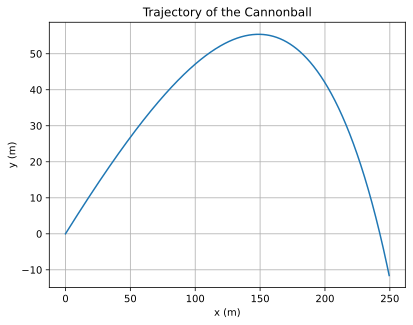

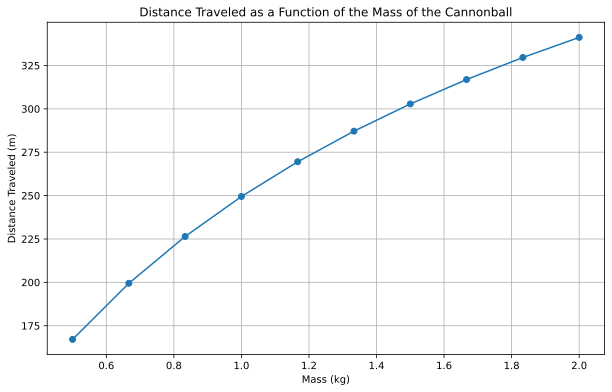

In [ ]:
from numpy import array, arange, pi, sin, cos, sqrt, linspace
from matplotlib import pyplot as plt
%config InlineBackend.figure_formats = ['svg']

# Constants
g = 9.81  # gravitational acceleration (m/s^2)
R = 0.08  # radius of the cannonball (m)
theta_0 = 30 * pi / 180  # launch angle converted to radians
v_0 = 100  # initial velocity (m/s)
rho = 1.22  # air density (kg/m^3)
C = 0.47  # drag coefficient
m = 1  # mass of the cannonball (kg)

t_0 = 0  # start time (s)
t_f = 7  # end time (s)
N = 10000  # number of time points
h = (t_f - t_0) / N  # step size (s)

def drag_coefficient(m):
    """
    Calculates the drag coefficient used for air resistance calculations, given the mass of the projectile.

    Arguments:
    m (float): Mass of the projectile in kilograms.

    Returns:
    float: The computed drag coefficient factor used in the drag force formula.
    """

    return (pi * R**2 * rho * C) / (2 * m)


def equations_of_motion(r, t, m):
    """
    Calculates the derivatives for the system of equations governing projectile motion under gravity and air resistance.
    
    Arguments:
    r (array): Current state vector [x, vx, y, vy] where x and y are positions and vx and vy are velocities.
    t (float): Current time (not used in this function, but typically required by ODE solvers).
    m (float): Mass of the projectile in kilograms.
    
    Returns:
    array: Derivatives [dx/dt, dvx/dt, dy/dt, dvy/dt] for use in numerical integration.
    """

    vx, vy = r[1], r[3]
    v = sqrt(vx**2 + vy**2)
    Fx = -drag_coefficient(m) * vx * v
    Fy = -g - drag_coefficient(m) * vy * v
    return array([vx, Fx, vy, Fy], float)

def trajectory(m):
    """
    Computes the trajectory of the projectile using the fourth-order Runge-Kutta method to solve the differential equations.
    
    Arguments:
    m (float): Mass of the projectile in kilograms.
    
    Returns:
    tuple:
        array: x-coordinates of the projectile over time.
        array: y-coordinates of the projectile over time.
    """

    # Initial conditions
    r = array([0, v_0 * cos(theta_0), 0, v_0 * sin(theta_0)], float)
    xpoints, ypoints = [], []

    for t in arange(t_0, t_f, h):
        xpoints.append(r[0])
        ypoints.append(r[2])
        k1 = h * equations_of_motion(r, t, m)
        k2 = h * equations_of_motion(r + 0.5 * k1, t + 0.5 * h, m)
        k3 = h * equations_of_motion(r + 0.5 * k2, t + 0.5 * h, m)
        k4 = h * equations_of_motion(r + k3, t + h, m)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return array(xpoints), array(ypoints)

def main():
    #Secion B.
    # Plot the trajectory of the cannonball
    x_points, y_points = trajectory(m)
    plt.plot(x_points, y_points)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Trajectory of the Cannonball')
    plt.grid(True)
    plt.show()

    #Section C.
    # Different masses
    masses = linspace(0.5, 2, 10)  # From 0.5 to 2 kg
    distances = []
    
    for mass in masses:
        x, y = trajectory(mass)
        distances.append(x[-1])
    
    # Plot distance traveled as a function of mass of the cannonball
    plt.figure(figsize=(10, 6))
    plt.plot(masses, distances, '-o')
    plt.xlabel('Mass (kg)')
    plt.ylabel('Distance Traveled (m)')
    plt.title('Distance Traveled as a Function of the Mass of the Cannonball')
    plt.grid(True)
    plt.show()

if __name__=='__main__':
    main()

By looking at the graph 'Distance Traveled as a Function of the Mass of the Cannonball, it seems that there's an almost linear relationship between the cannonball's mass and the distance that it traveles, the greater the mass, the greater the distance.  
Air resistence or drag force as we seen in the begining of the problem, are not dependet in the mass of the object, however, the deceleration is inversely proportional to the mass.  
In other words, heavier objects have more momentum due to an increased mass and the drag force is only affected by the velocity(and density, etc. but not the object's mass).
